# **SBD rank**

- Goal: make a webpage that enables users to compare their Squat/Bench/Deadlift numbers to people of same sex, age group and weightclass

- This notebook cleans dataset from Openpowerlifting.org and prepares new dataset to be used in back-end of website


This page uses data from the OpenPowerlifting project, https://www.openpowerlifting.org.
You may download a copy of the data at https://data.openpowerlifting.org.


TODO:
- Get more data, current data seems to not include enough low-level lifters
- Flask deployment



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**IMPORT DATASET**

In [3]:
raw_df = pd.read_csv('openpowerlifting-2022-02-26-ac057e38.csv')
print(raw_df.columns)
raw_df.head()

C:\Users\Bruker\AppData\Local\Temp\ipykernel_17056\1226199905.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('openpowerlifting-2022-02-26-ac057e38.csv')


Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName'],
      dtype='object')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


**Exploratory data analysis and data cleaning**

In [4]:
raw_df['Name'].value_counts()

#need to remove people with multiple entries. Only keep one with highest total
#~685000 unique names, ~2600000 total entries

Magomedamin Israpilov    382
Evgeniy Svoboda          297
Alan Aerts               286
Bonnie Aerts             277
Vladimir Kulakov         255
                        ... 
C. Sanchez                 1
M. Millirow                1
R. Behrens                 1
T. Karnavas                1
Ronald Tubiniez            1
Name: Name, Length: 685943, dtype: int64

In [5]:
raw_df = raw_df.sort_values(by=['TotalKg'], ascending=False)
print(len(raw_df))
raw_df[['Name','Event','TotalKg']].head()

2620938


,Name,Event,TotalKg
992365,Dave Hoff,SBD,1407.50
1011208,Dave Hoff,SBD,1367.50
836886,Dave Hoff,SBD,1365.31
840014,Dave Hoff,SBD,1363.05
1491653,Donnie Thompson #1,SBD,1360.78


In [6]:
#Drop duplicates. For every Name, keep only record with highest TotalKg
raw_df = raw_df.drop_duplicates('Name')
print(len(raw_df))
raw_df[['Name','Event','TotalKg']].head()

685943


,Name,Event,TotalKg
992365,Dave Hoff,SBD,1407.50
1491653,Donnie Thompson #1,SBD,1360.78
1933390,Jonas Rantanen,SBD,1340.00
322847,Blaine Sumner,SBD,1296.00
1490534,AJ Roberts,SBD,1295.01


In [7]:
raw_df[['Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg']]

,Squat1Kg,Squat2Kg,Squat3Kg,Squat4Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg
992365,532.5,577.5,NaN,NaN,577.50,425.0,442.5,460.0,NaN,460.00,340.0,370.0,NaN,NaN,370.00,1407.50
1491653,NaN,NaN,NaN,NaN,573.79,NaN,NaN,NaN,NaN,430.91,NaN,NaN,NaN,NaN,356.07,1360.78
1933390,NaN,NaN,NaN,NaN,575.00,NaN,NaN,NaN,NaN,390.00,NaN,NaN,NaN,NaN,375.00,1340.00
322847,475.0,515.0,NaN,NaN,515.00,426.0,-455.5,-455.5,NaN,426.00,225.0,335.0,355.0,NaN,355.00,1296.00
1490534,NaN,NaN,NaN,NaN,546.58,NaN,NaN,NaN,NaN,396.89,NaN,NaN,NaN,NaN,351.53,1295.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620471,-237.5,-237.5,-237.5,NaN,NaN,115.0,-120.0,-120.0,NaN,115.00,215.0,-225.0,-225.0,NaN,215.00,NaN
2620517,-270.0,-270.0,-270.0,NaN,NaN,170.0,-172.5,-200.0,NaN,170.00,NaN,NaN,NaN,NaN,NaN,NaN
2620536,270.0,-300.0,-305.0,NaN,270.00,180.0,-200.0,-200.0,NaN,180.00,-270.0,-270.0,-270.0,NaN,NaN,NaN
2620574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = raw_df[['Sex','Event','Equipment','Age', 'BodyweightKg', 'Best3SquatKg','Best3BenchKg','Best3DeadliftKg', 'TotalKg','Tested']]
df_num = df[['Age', 'BodyweightKg', 'Best3SquatKg','Best3BenchKg','Best3DeadliftKg', 'TotalKg']]
df_cat = df[['Sex', 'Event', 'Equipment']]
df.head()

,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Tested
992365,M,SBD,Multi-ply,31.0,132.60,577.50,460.00,370.00,1407.50,NaN
1491653,M,SBD,Multi-ply,46.5,174.69,573.79,430.91,356.07,1360.78,NaN
1933390,M,SBD,Multi-ply,26.5,140.00,575.00,390.00,375.00,1340.00,NaN
322847,M,SBD,Single-ply,32.0,176.24,515.00,426.00,355.00,1296.00,Yes
1490534,M,SBD,Multi-ply,26.5,137.71,546.58,396.89,351.53,1295.01,NaN


In [9]:
df['Equipment'].value_counts()
#Make two categories (Raw and equipped(belt, sleeves and single-ply suits))

Single-ply    308335
Raw           288707
Wraps          61473
Multi-ply      26200
Unlimited       1221
Straps             7
Name: Equipment, dtype: int64

In [10]:
df['Tested'].value_counts()
#can drop entire column

Yes    487113
Name: Tested, dtype: int64

In [11]:
df['Event'].value_counts()
#Only look at events where all events occur (SBD)

SBD    533975
B      107961
D       28456
BD      13036
S        1426
SB        589
SD        500
Name: Event, dtype: int64

In [12]:
df['Sex'].value_counts()
#look at M and F

M     518044
F     167890
Mx         9
Name: Sex, dtype: int64

In [13]:
print(df['Age'].max())
print(df['Age'].min())

97.0
0.0


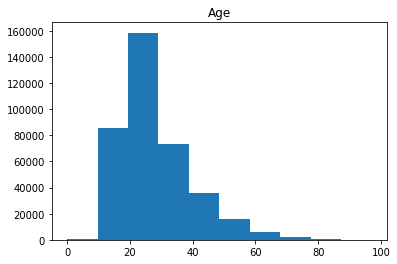

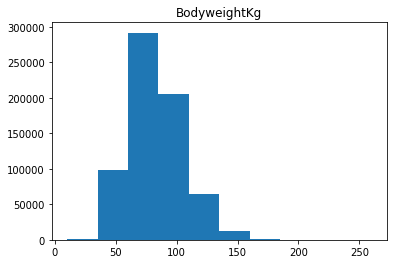

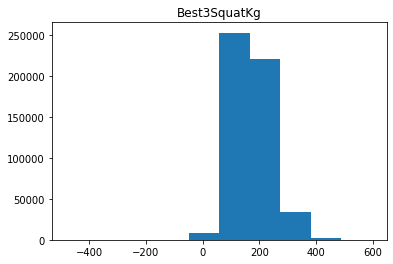

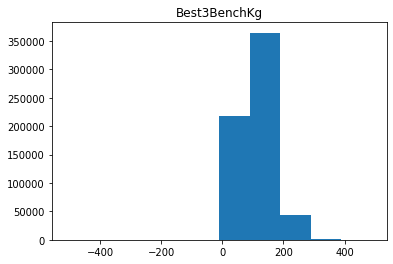

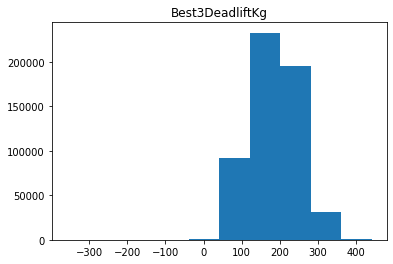

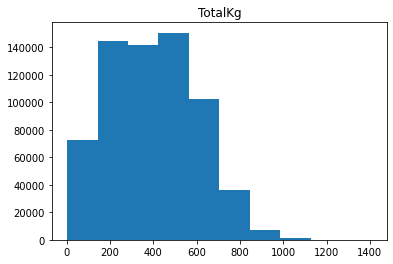

In [14]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [15]:
#Drop tested column (only one value)
df = df.drop(['Tested'], axis=1)

#Only keep columns that have Equipment='Raw' or Equipment='Single-Ply'
df = df[df.Equipment.isin(['Raw','Single-ply'])]

#Remove entires with age below 15
df = df[df.Age >= 15]

#Remove entries with Sex='Mx' (too few to give statistics)
df = df[df.Sex != 'Mx']

#Only keep entries with event 'SBD'
df = df[df.Event == 'SBD']

df

,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
322847,M,SBD,Single-ply,32.0,176.24,515.0,426.0,355.0,1296.0
1699652,M,SBD,Single-ply,30.0,164.80,482.5,377.5,370.0,1230.0
2602239,M,SBD,Single-ply,23.5,168.02,490.0,350.0,390.0,1230.0
1480701,M,SBD,Single-ply,31.0,152.41,462.5,362.5,377.5,1202.5
608332,M,SBD,Single-ply,28.0,NaN,472.7,367.5,352.5,1192.7
...,...,...,...,...,...,...,...,...,...
2620471,M,SBD,Single-ply,22.5,58.00,NaN,115.0,215.0,NaN
2620517,M,SBD,Single-ply,39.5,81.80,NaN,170.0,NaN,NaN
2620536,M,SBD,Single-ply,26.5,84.90,270.0,180.0,NaN,NaN
2620574,M,SBD,Single-ply,33.5,104.00,NaN,NaN,NaN,NaN


In [16]:
print(df.Equipment.value_counts())
print(df.Age.min())
print(df.Sex.value_counts())
print(df.Event.value_counts())

Raw           141081
Single-ply     75117
Name: Equipment, dtype: int64
15.0
M    152326
F     63872
Name: Sex, dtype: int64
SBD    216198
Name: Event, dtype: int64


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 216198 entries, 322847 to 2620594
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sex              216198 non-null  object 
 1   Event            216198 non-null  object 
 2   Equipment        216198 non-null  object 
 3   Age              216198 non-null  float64
 4   BodyweightKg     215547 non-null  float64
 5   Best3SquatKg     212728 non-null  float64
 6   Best3BenchKg     211639 non-null  float64
 7   Best3DeadliftKg  211660 non-null  float64
 8   TotalKg          209595 non-null  float64
dtypes: float64(6), object(3)
memory usage: 16.5+ MB


In [18]:
#drop rows that have any NaN values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208776 entries, 322847 to 274092
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sex              208776 non-null  object 
 1   Event            208776 non-null  object 
 2   Equipment        208776 non-null  object 
 3   Age              208776 non-null  float64
 4   BodyweightKg     208776 non-null  float64
 5   Best3SquatKg     208776 non-null  float64
 6   Best3BenchKg     208776 non-null  float64
 7   Best3DeadliftKg  208776 non-null  float64
 8   TotalKg          208776 non-null  float64
dtypes: float64(6), object(3)
memory usage: 15.9+ MB


In [19]:
df.describe()

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg
count,208776.000000,208776.000000,208776.000000,208776.000000,208776.000000,208776.000000
mean,27.100026,82.458048,173.018398,112.834815,192.807591,478.660306
std,10.393395,21.122907,64.837768,47.888876,59.578656,166.755027
min,15.000000,30.000000,10.000000,15.000000,20.000000,61.230000
25%,19.500000,66.700000,122.500000,72.500000,145.000000,340.000000
50%,24.000000,80.920000,170.000000,111.130000,195.000000,480.000000
75%,31.500000,94.900000,215.000000,145.000000,237.500000,595.000000
max,91.500000,260.000000,515.000000,426.000000,440.000000,1296.000000


In [20]:
#Split into male and female dataframes

df_M = df[df.Sex =='M']
df_F = df[df.Sex =='F']

print(len(df_M))
print(len(df_F))

146672
62104


**Create age-bins and weight-bins**

In [21]:
#Age bins
#15-20
#20-25
#25-30
#etc...

cutoff_age = [15,20,25,30,35,40,45,50,55,60,100]
age_labels = ['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-100']

df_F['age_bin'] = pd.cut(df_F['Age'], bins=cutoff_age, labels=age_labels)
df_M['age_bin'] = pd.cut(df_M['Age'], bins=cutoff_age, labels=age_labels)

print(len(df_M))
print(len(df_F))
df_F.head()



146672
62104


C:\Users\Bruker\AppData\Local\Temp\ipykernel_17056\3054732759.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F['age_bin'] = pd.cut(df_F['Age'], bins=cutoff_age, labels=age_labels)
C:\Users\Bruker\AppData\Local\Temp\ipykernel_17056\3054732759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['age_bin'] = pd.cut(df_M['Age'], bins=cutoff_age, labels=age_labels)


,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,age_bin
296210,F,SBD,Single-ply,30.0,134.44,325.0,215.5,252.5,793.0,25-30
1556284,F,SBD,Single-ply,43.5,130.20,335.0,200.0,240.0,775.0,40-45
1569313,F,SBD,Single-ply,36.5,114.70,297.5,212.5,250.0,760.0,35-40
296211,F,SBD,Single-ply,31.5,163.38,300.0,182.5,271.0,753.5,30-35
2587987,F,SBD,Single-ply,26.5,120.95,300.0,182.5,270.5,753.0,25-30


In [22]:
#Weight bins
#need to create weight bins. IPF categories:
#Women: 47 kg, 52 kg, 57 kg, 63 kg, 69 kg, 76 kg, 84 kg, 84 kg+ 
#Men: 59 kg, 66 kg, 74 kg, 83 kg, 93 kg, 105 kg, 120 kg, 120 kg+

F_weight_cutoffs = [0,47,52,57,63,69,76,84,1000]
F_weight_labels = ['47kg','52kg','57kg','63kg','69kg','76kg','84kg','84kg+']
M_weight_cutoffs = [0,59,66,74,83,93,105,120,1000]
M_weight_labels = ['59kg','66kg','74kg','83kg','93kg','105kg','120kg','120kg+']

df_F['weight_bin'] = pd.cut(df_F['BodyweightKg'], bins=F_weight_cutoffs, labels=F_weight_labels)
df_M['weight_bin'] = pd.cut(df_M['BodyweightKg'], bins=M_weight_cutoffs, labels=M_weight_labels)

print(len(df_M))
print(len(df_F))
df_F.head()


C:\Users\Bruker\AppData\Local\Temp\ipykernel_17056\2280627078.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_F['weight_bin'] = pd.cut(df_F['BodyweightKg'], bins=F_weight_cutoffs, labels=F_weight_labels)


146672
62104


C:\Users\Bruker\AppData\Local\Temp\ipykernel_17056\2280627078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_M['weight_bin'] = pd.cut(df_M['BodyweightKg'], bins=M_weight_cutoffs, labels=M_weight_labels)


,Sex,Event,Equipment,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,age_bin,weight_bin
296210,F,SBD,Single-ply,30.0,134.44,325.0,215.5,252.5,793.0,25-30,84kg+
1556284,F,SBD,Single-ply,43.5,130.20,335.0,200.0,240.0,775.0,40-45,84kg+
1569313,F,SBD,Single-ply,36.5,114.70,297.5,212.5,250.0,760.0,35-40,84kg+
296211,F,SBD,Single-ply,31.5,163.38,300.0,182.5,271.0,753.5,30-35,84kg+
2587987,F,SBD,Single-ply,26.5,120.95,300.0,182.5,270.5,753.0,25-30,84kg+


In [31]:
df_M.to_csv('male_powerlifters.csv', index = False)
df_F.to_csv('female_powerlifters.csv', index = False)

**Example of how user statistics will be calculated based on inputs**

In [29]:
#================USER INPUTS=======================
user_equipment = 'Raw'
user_sex = 'M'
user_age = 24
user_weight = 82
user_bench = 110
user_squat = 130
user_deadlift = 200
user_total = user_bench + user_squat + user_deadlift
#===================================================



user_df = pd.DataFrame({'Sex': [user_sex], 'Equipment': [user_equipment], 'Age': [user_age], 'BodyweightKg': [user_weight], 'Best3SquatKg': [user_squat], 'Best3BenchKg': [user_bench], 'Best3DeadliftKg': [user_deadlift], 'TotalKg': [user_total]})


F_weight_cutoffs = [0,47,52,57,63,69,76,84,1000]
F_weight_labels = ['47kg','52kg','57kg','63kg','69kg','76kg','84kg','84kg+']
M_weight_cutoffs = [0,59,66,74,83,93,105,120,1000]
M_weight_labels = ['59kg','66kg','74kg','83kg','93kg','105kg','120kg','120kg+']
if user_sex == 'M':
    user_df['weight_bin'] = pd.cut(user_df['BodyweightKg'], bins=M_weight_cutoffs, labels=M_weight_labels)

elif user_sex == 'F':
    user_df['weight_bin'] = pd.cut(user_df['BodyweightKg'], bins=F_weight_cutoffs, labels=F_weight_labels)



cutoff_age = [15,20,25,30,35,40,45,50,55,60,100]
age_labels = ['15-20','20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-100']
user_df['age_bin'] = pd.cut(user_df['Age'], bins=cutoff_age, labels=age_labels)

user_df.head()


,Sex,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,weight_bin,age_bin
0,M,24,82,130,110,200,440,83kg,20-25


In [28]:
#calculate stats
#compare strength  to people in same sex, equipment weight and age categories
print('Sex category:',user_sex)
print('Equipment category:',user_equipment)
print('Weight category:',user_df.loc[0,'weight_bin'],'kg')
print('Age category:',user_df.loc[0,'age_bin'])

if user_sex == 'M':
    people_in_group = len(df_M[(df_M['age_bin'] == user_df.loc[0,'age_bin']) & (df_M['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_M['Equipment'] == user_equipment)])

    #squat analysis
    people_with_lower_squat = len(df_M[(df_M['Best3SquatKg'] < user_squat ) & (df_M['age_bin'] == user_df.loc[0,'age_bin']) & (df_M['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_M['Equipment'] == user_equipment)])
    x = people_with_lower_squat/people_in_group *100
    print(f'Your squat is stronger than {x:.2f} % of people in your sex, equipment, age and weight group!')
    #bench analysis
    people_with_lower_bench = len(df_M[(df_M['Best3BenchKg'] < user_bench) & (df_M['age_bin'] == user_df.loc[0,'age_bin']) & (df_M['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_M['Equipment'] == user_equipment)])
    x = people_with_lower_bench/people_in_group *100
    print(f'Your bench is stronger than {x:.2f} % of people in your sex, equipment, age and weight group!')
    #deadlift analysis
    people_with_lower_deadlift = len(df_M[(df_M['Best3DeadliftKg'] < user_deadlift) & (df_M['age_bin'] == user_df.loc[0,'age_bin']) & (df_M['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_M['Equipment'] == user_equipment)])
    x = people_with_lower_deadlift/people_in_group *100
    print(f'Your deadlift is stronger than {x:.2f} % of people in your sex, equipment, age and weight group!')
    #total analysis
    people_with_lower_total = len(df_M[(df_M['TotalKg'] < user_total) & (df_M['age_bin'] == user_df.loc[0,'age_bin']) & (df_M['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_M['Equipment'] == user_equipment)])
    x = people_with_lower_total/people_in_group *100
    print(f'Your total is higher than {x:.2f} % of people in your sex, equipment, age and weight group!')

if user_sex == 'F':
    people_in_group = len(df_F[(df_F['age_bin'] == user_df.loc[0,'age_bin']) & (df_F['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_F['Equipment'] == user_equipment)])
    
    #squat analysis
    people_with_lower_squat = len(df_F[(df_F['Best3SquatKg'] < user_squat ) & (df_F['age_bin'] == user_df.loc[0,'age_bin']) & (df_F['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_F['Equipment'] == user_equipment)])
    x = people_with_lower_squat/people_in_group *100
    print(f'Your squat is stronger than {x:.2f}% of people in your sex, equipment, age and weight group!')
    #bench analysis
    people_with_lower_bench = len(df_F[(df_F['Best3BenchKg'] < user_bench) & (df_F['age_bin'] == user_df.loc[0,'age_bin']) & (df_F['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_F['Equipment'] == user_equipment)])
    x = people_with_lower_bench/people_in_group *100
    print(f'Your bench is stronger than {x:.2f}% of people in your sex, equipment, age and weight group!')
    #deadlift analysis
    people_with_lower_deadlift = len(df_F[(df_F['Best3DeadliftKg'] < user_deadlift) & (df_F['age_bin'] == user_df.loc[0,'age_bin']) & (df_F['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_F['Equipment'] == user_equipment)])
    x = people_with_lower_deadlift/people_in_group *100
    print(f'Your deadlift is stronger than {x:.2f}% of people in your sex, equipment, age and weight group!')
    #total analysis
    people_with_lower_total = len(df_F[(df_F['TotalKg'] < user_total) & (df_F['age_bin'] == user_df.loc[0,'age_bin']) & (df_F['weight_bin'] == user_df.loc[0,'weight_bin']) & (df_F['Equipment'] == user_equipment)])
    x = people_with_lower_total/people_in_group *100
    print(f'Your total is higher than {x:.2f}% of people in your sex, equipment, age and weight group!')


Sex category: M
Weight category: 83kg kg
Age category: 20-25
Your squat is stronger than 2.12 % of people in your sex, age and weight group!
Your bench is stronger than 8.56 % of people in your sex, age and weight group!
Your deadlift is stronger than 15.55 % of people in your sex, age and weight group!
Your total is higher than 6.16 % of people in your sex, age and weight group!
